In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('column_2C_weka.csv')
plt.style.use('ggplot')

# EDA

In [3]:
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt numeric       310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


In [5]:
data.describe()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


pd.plotting.scatter_matrix:

    green: normal and red: abnormal
    c: color
    figsize: figure size
    diagonal: histohram of each feature
    alpha: opacity
    s: size of marker
    marker: marker type

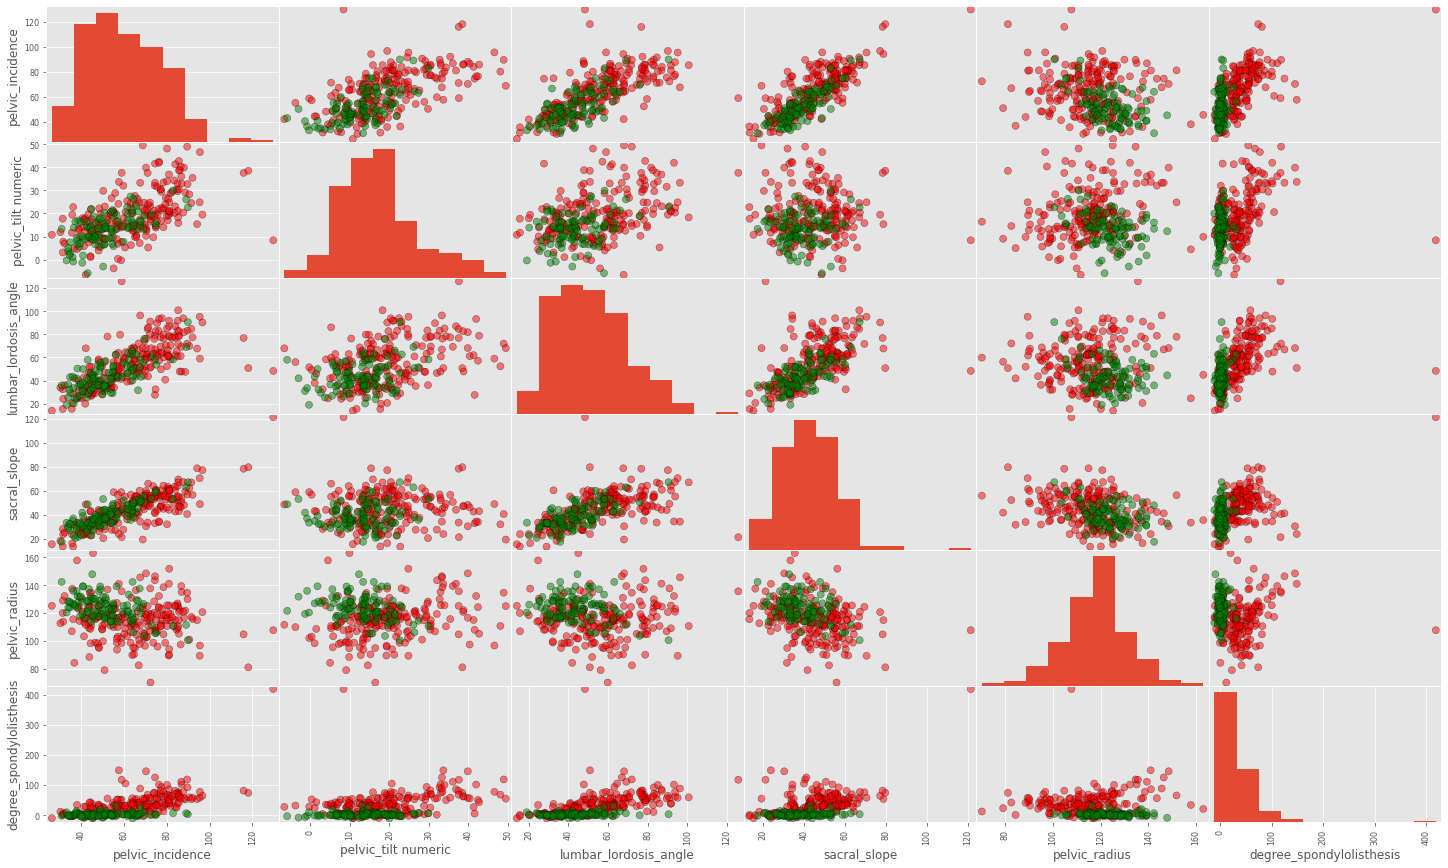

In [6]:
color_list = ['red' if i=='Abnormal' else 'green' for i in data.loc[:, 'class']]
pd.plotting.scatter_matrix(
    data.loc[:, data.columns != 'class'], 
    c=color_list, 
    figsize=[25,15], 
    diagonal='hist', 
    alpha=0.5, 
    s=200, 
    marker='.',
    edgecolor='black'
)
plt.show()

In [7]:
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


Abnormal    210
Normal      100
Name: class, dtype: int64

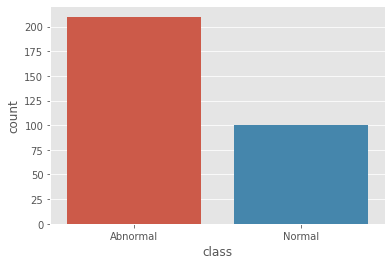

In [8]:
sns.countplot(x='class', data=data)
data.loc[:, 'class'].value_counts()

    Note: The dataset is imbalanced. Class 'Abnormal' has almost double the rows than class 'Normal'
    (Better to find a way to evenly split the data then train the model)

### Splitting the data into training and testing sets.

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x = data.iloc[:, :-1]
y = data.iloc[:, -1]
# y = data['class']

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, random_state = 42)

### Applying PCA

In [12]:
# First scaling the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

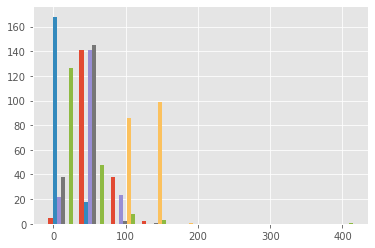

In [13]:
plt.hist(x_train)
plt.show()

In [14]:
scaled_x_train = sc.fit_transform(x_train)
scaled_x_test = sc.transform(x_test)

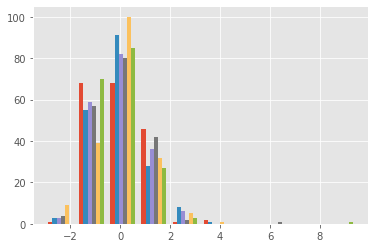

In [15]:
plt.hist(scaled_x_train)
plt.show()

In [16]:
from sklearn.decomposition import PCA

#### Performing PCA on both, unscaled and scaled data.

In [17]:
pca_uc = PCA(n_components = 2)
pca_x_train = pca_uc.fit_transform(x_train)
pca_x_test = pca_uc.transform(x_test)

In [18]:
pca_sc = PCA(n_components = 2)
pca_sc_x_train = pca_sc.fit_transform(scaled_x_train)
pca_sc_x_test = pca_sc.transform(scaled_x_test)

    Since we have chosen 3 principal components to explain the most variance in our above sample dataset, in the below code snippet 
    we will look at the amount of variance explained by each of the selected components.
    The pca.explained_variance_ratio_ parameter returns a vector of the variance explained by each dimension.

In [19]:
pca_uc.explained_variance_ratio_

array([0.74545655, 0.1262686 ])

    The output shows that the first principal component explains 74.5% variance, and the second principal component explains only 12.6% of this dataset. 
    Generally a good threshold is 50%. But 60% or more is recommended.

In [20]:
pca_sc.explained_variance_ratio_

array([0.54102907, 0.17790614])

    The variance explained by the first principal component of scaled data is significatly reduced as compared to that of scaled data. Also the variance 
    explained by the other two components has increased. This is because the data is distributed.

In [21]:
target = [1 if i=='Abnormal' else 0 for i in data.iloc[:, -1].values]
print(target)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [22]:
# Get count of a specific value in list
target.count(0)

100

## K-Nearest Neighbour

In [23]:
from sklearn.neighbors import KNeighborsClassifier 

In [24]:
# Initializing model
knn = KNeighborsClassifier(n_neighbors = 3)

In [25]:
knn.fit(pca_x_train, y_train)
prediction = knn.predict(pca_x_test)
print('With KNN (K=3) on Unscaled PCA data accuracy is:', round(knn.score(pca_x_test, y_test)*100, 3))

With KNN (K=3) on Unscaled PCA data accuracy is: 76.613


In [26]:
knn.fit(pca_sc_x_train, y_train)
prediction = knn.predict(pca_sc_x_test)
print('With KNN (K=3) on Scaled PCA data accuracy is:', round(knn.score(pca_sc_x_test, y_test)*100, 3))

With KNN (K=3) on Scaled PCA data accuracy is: 70.161


## Model Complexity

In [27]:
def model_complexity(x_train_data, x_test_data, y_train_data, y_test_data):
    # x_train, x_test, y_train, y_test 
    neig = np.arange(1, 25)
    train_accuracy = []
    test_accuracy = []

    # Looping on different values of K to get best result
    for i, k in enumerate(neig):
        knn = KNeighborsClassifier(n_neighbors = k)
        knn.fit(x_train_data, y_train_data)
        train_accuracy.append(round(knn.score(x_train_data, y_train_data)*100, 3))
        test_accuracy.append(round(knn.score(x_test_data, y_test_data)*100, 3))

    # Plotting Graph
    plt.figure(figsize=[30, 12])
    plt.plot(neig, test_accuracy, label = 'Test Accuracy')
    plt.plot(neig, train_accuracy, label = 'Train Accuracy')
    plt.legend()
    plt.title('Value VS Accuracy')
    plt.xlabel('Number of Neighbours')
    plt.ylabel('Accuracy')
    plt.xticks(neig)
    # plt.savefig('graph_pca2.png')
    plt.show()
    print('Best Accuracy is {} with K = {}'.format(np.max(test_accuracy), 1 + test_accuracy.index(np.max(test_accuracy))))

### Normal data

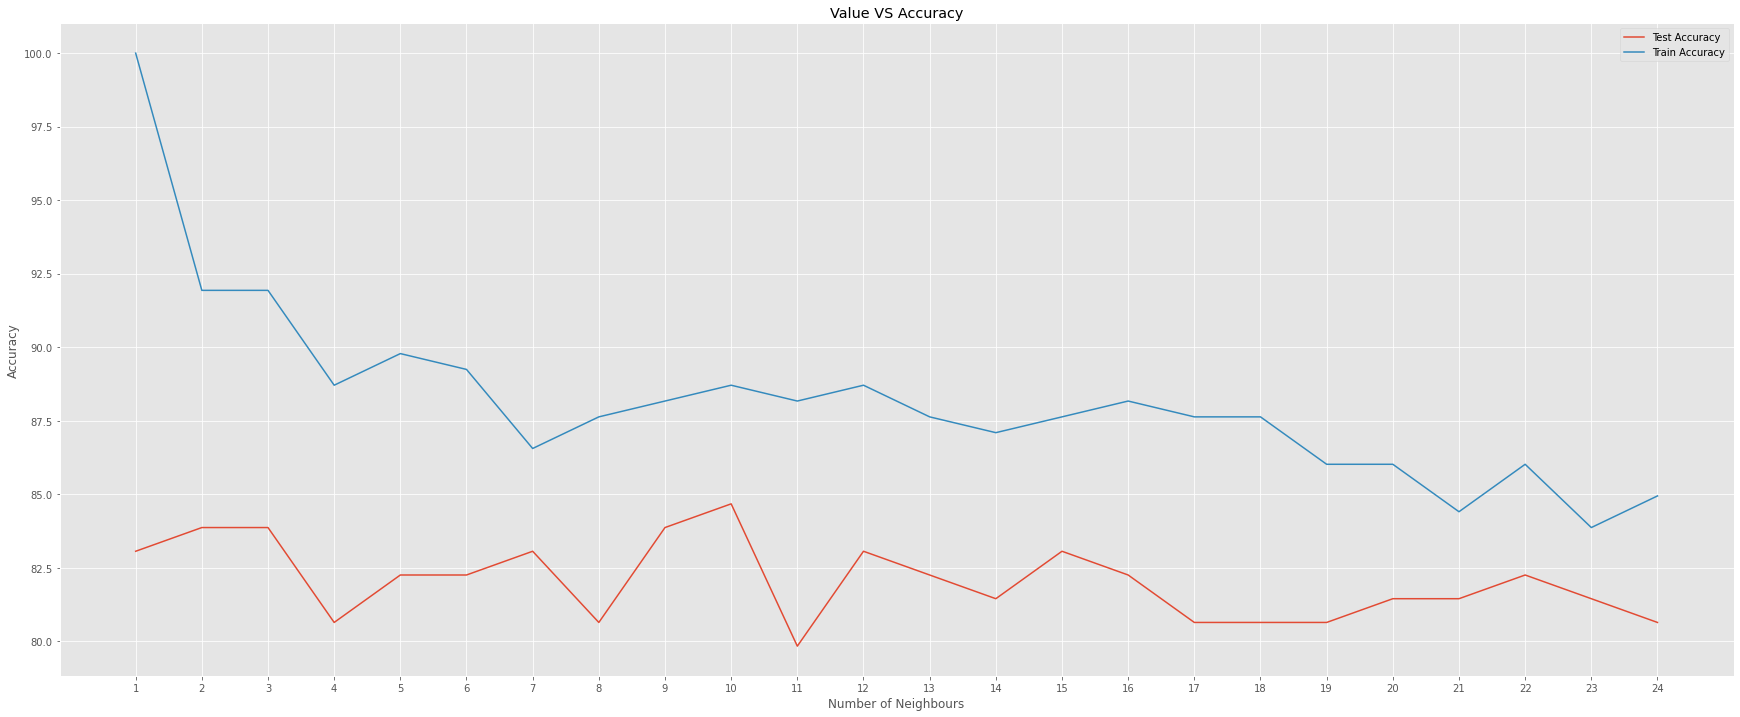

Best Accuracy is 84.677 with K = 10


In [28]:
model_complexity(x_train, x_test, y_train, y_test)

### Scaled Normal data

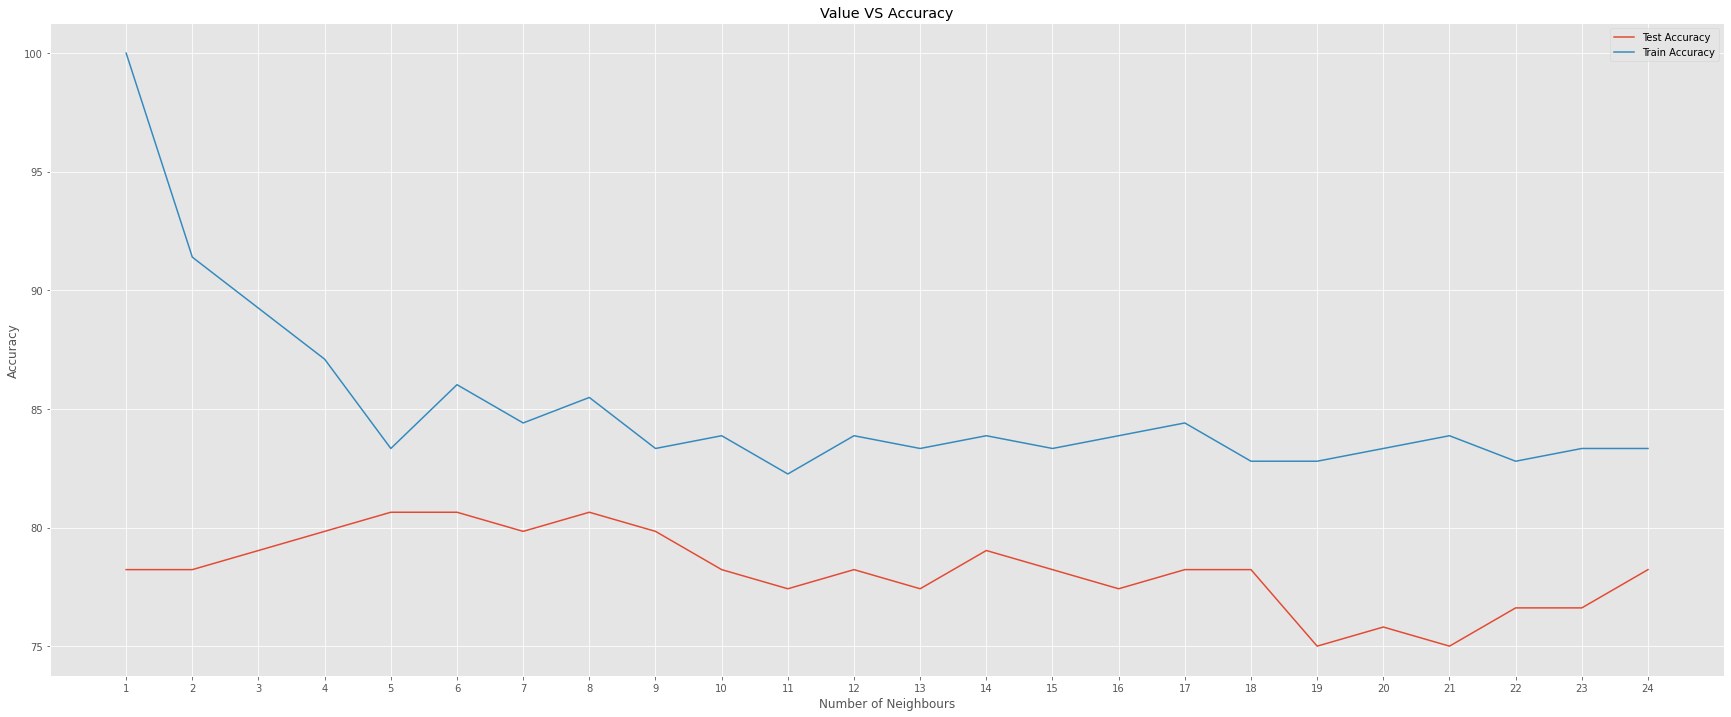

Best Accuracy is 80.645 with K = 5


In [29]:
model_complexity(scaled_x_train, scaled_x_test, y_train, y_test)

### PCA Unscaled data

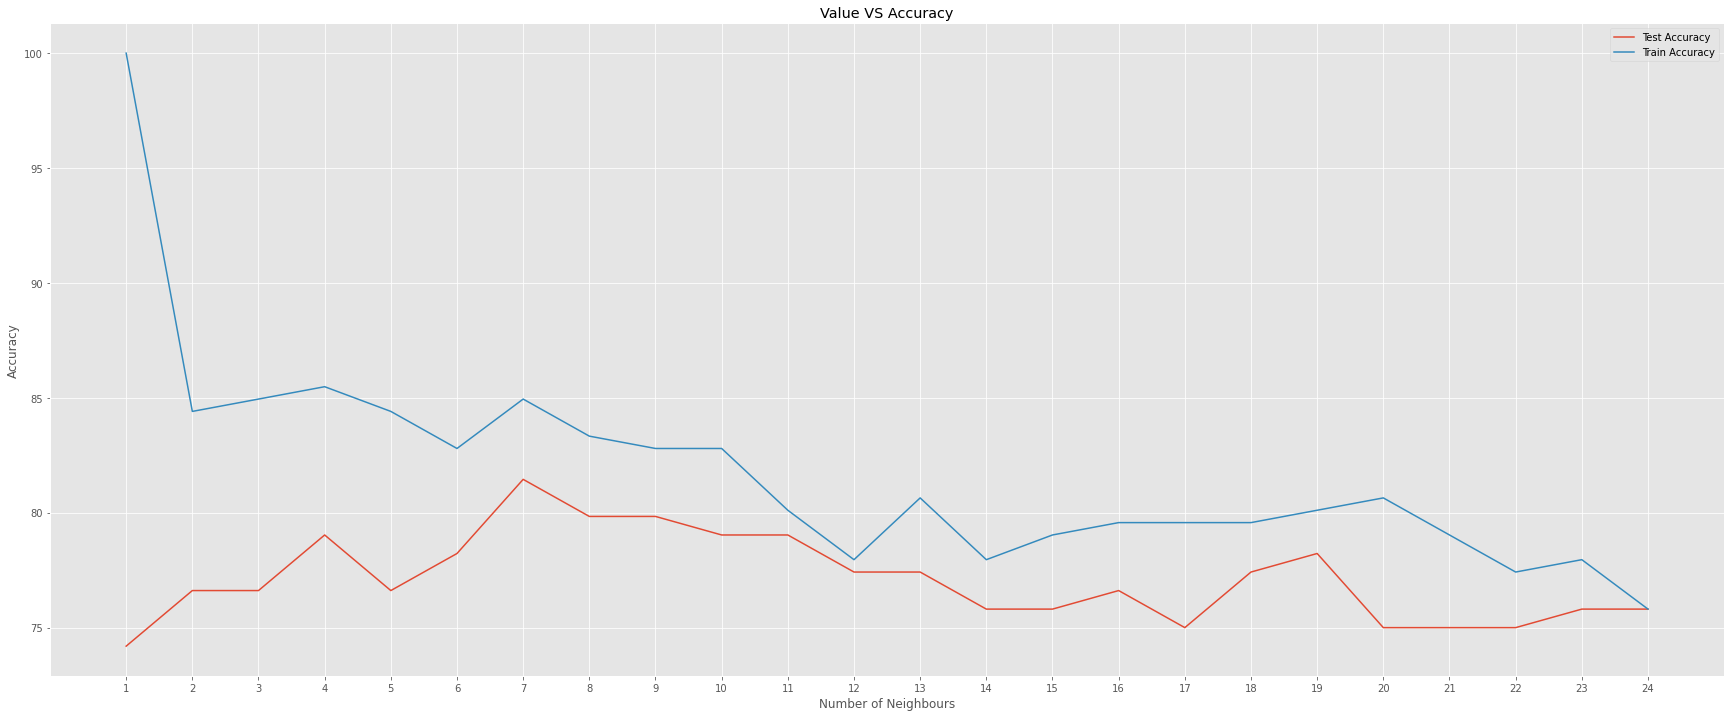

Best Accuracy is 81.452 with K = 7


In [30]:
model_complexity(pca_x_train, pca_x_test, y_train, y_test)

### PCA Scaled data


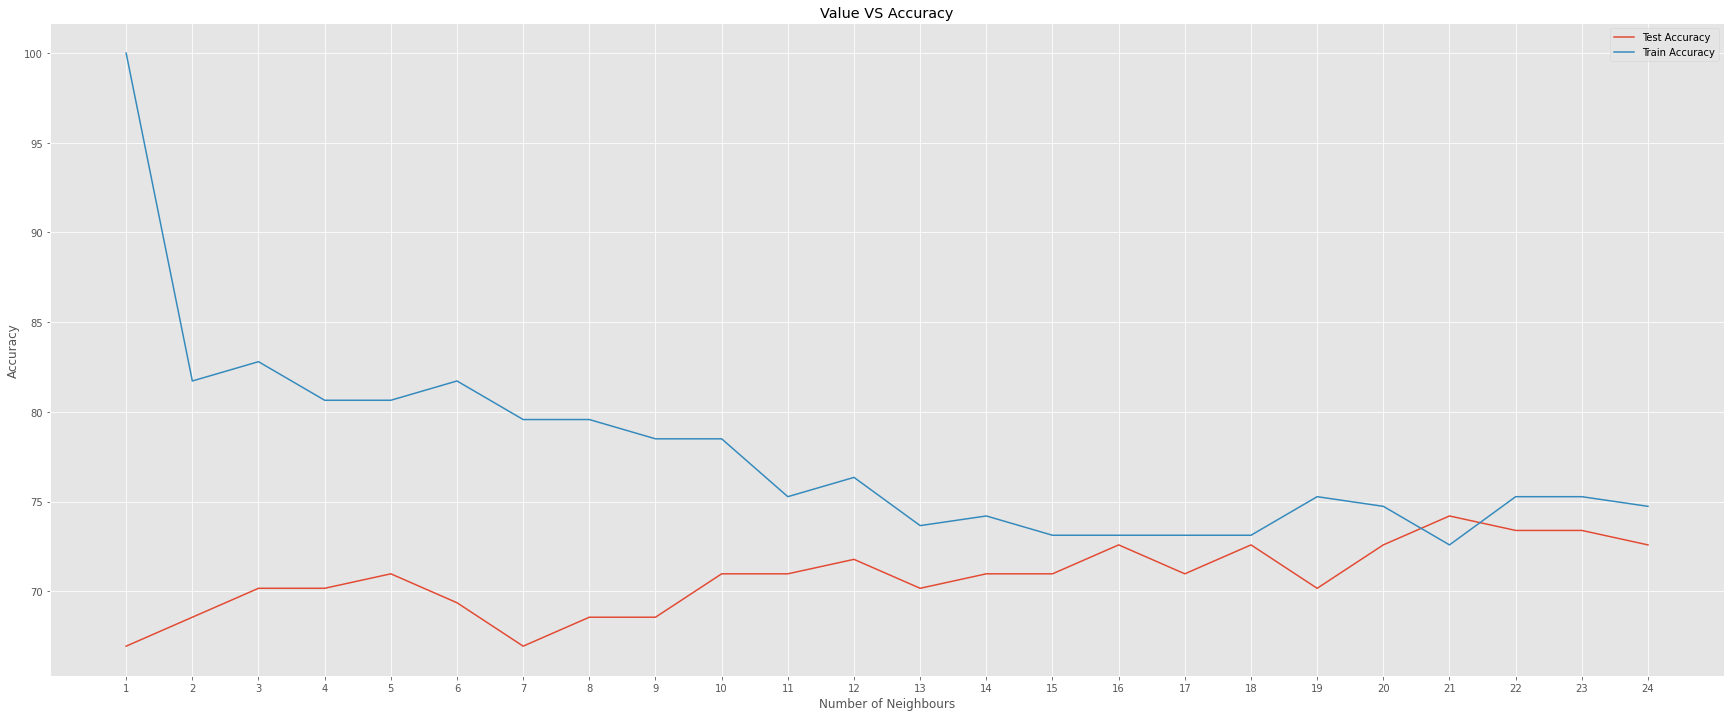

Best Accuracy is 74.194 with K = 21


In [31]:
model_complexity(pca_sc_x_train, pca_sc_x_test, y_train, y_test)

# PCA using 3 Dimensions

In [32]:
scaled_data = sc.fit_transform(x)

In [33]:
pca3 = PCA(n_components = 3)
x_pca3 = pca3.fit_transform(scaled_data)

In [34]:
x_pca3.shape

(310, 3)

In [35]:
x_pc3_df = pd.DataFrame(x_pca3, columns = ['PC1','PC2','PC3'])
x_pc3_df.head()

,PC1,PC2,PC3
0,-0.238623,-0.893126,-1.547663
1,-2.246635,-0.401364,-0.303298
2,0.278507,-0.654382,-1.008548
3,0.374460,-0.658015,-1.344500
4,-1.373478,-1.061649,-0.262206


In [36]:
import plotly.express as px
fig = px.scatter_3d(x_pc3_df, x='PC1', y='PC2', z='PC3', color=target)
fig.show()

In [37]:
knn = KNeighborsClassifier(n_neighbors = 3)
x, y = x_pca3, target
knn.fit(x, y)
prediction = knn.predict(x)
# print('Prediction: {}'.format(prediction))

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x_pca3, target, test_size = 0.3, random_state = 42)
knn = KNeighborsClassifier(n_neighbors = 3)

knn.fit(x_train, y_train)
prediction = knn.predict(x_test)
print('With KNN (K=3) on PCA3 data accuracy is:', round(knn.score(x_test, y_test)*100, 3))

With KNN (K=3) on PCA3 data accuracy is: 75.269


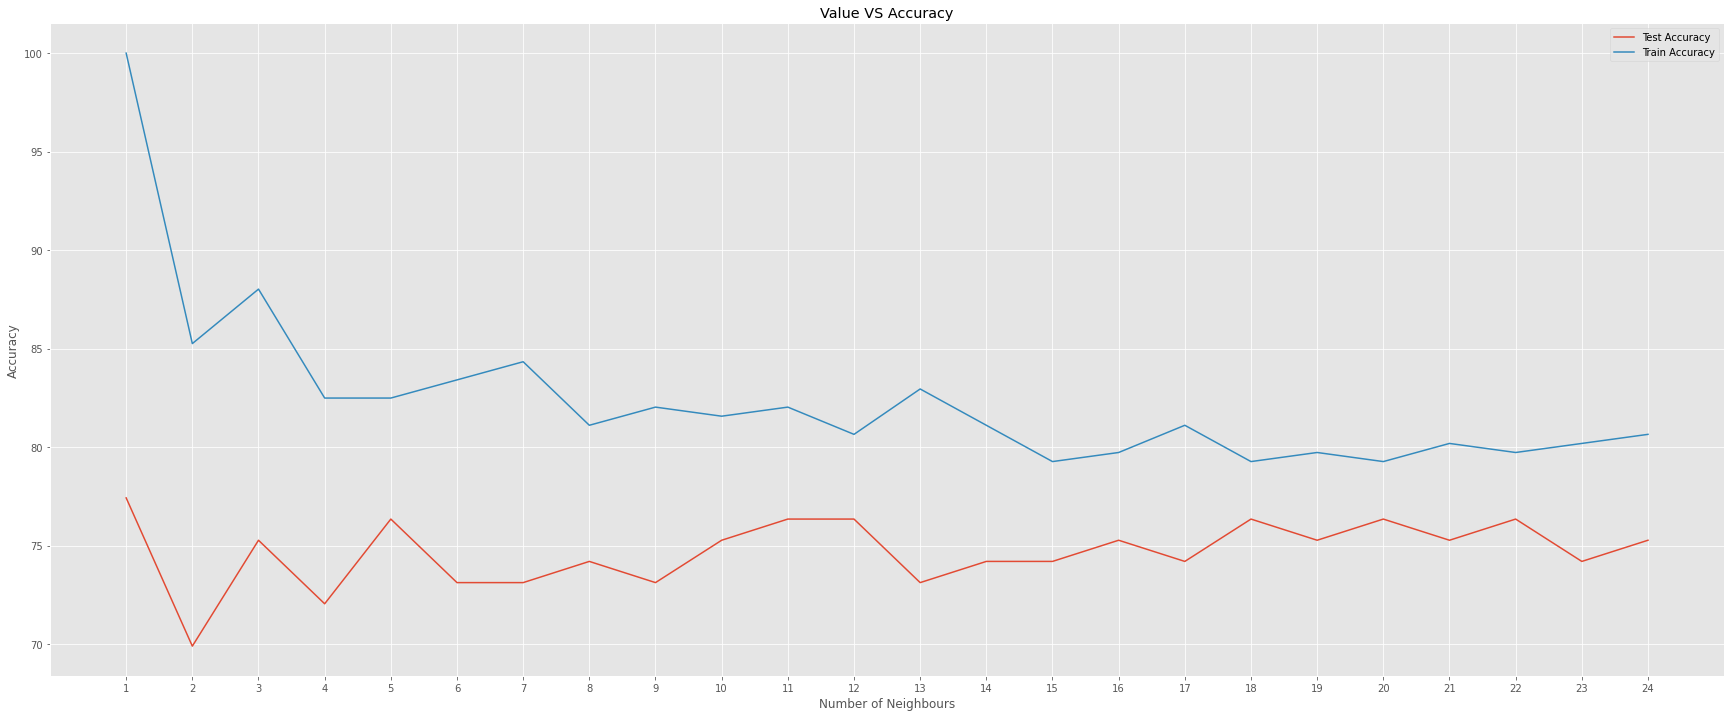

Best Accuracy is 77.419 with K = 1


In [39]:
model_complexity(x_train, x_test, y_train, y_test)
# x_train_data, x_test_data, y_train_data, y_test_data

# Using Regression Algorithms

REGRESSION

    Supervised learning
    Using linear and logistic regression.
    This orthopedic patients data is not proper for regression so only two features are used, That are sacral_slope and pelvic_incidence of abnormal class.
        Considering only one feature pelvic_incidence and target as sacral_slope
        Let's look at scatter plot so as to understand it better.
        reshape(-1, 1): If you do not use it the shape of x or y becomes (210,) and we cannot use it in sklearn, 
        so we use reshape(-1, 1) so it has the total number of rows and one column.


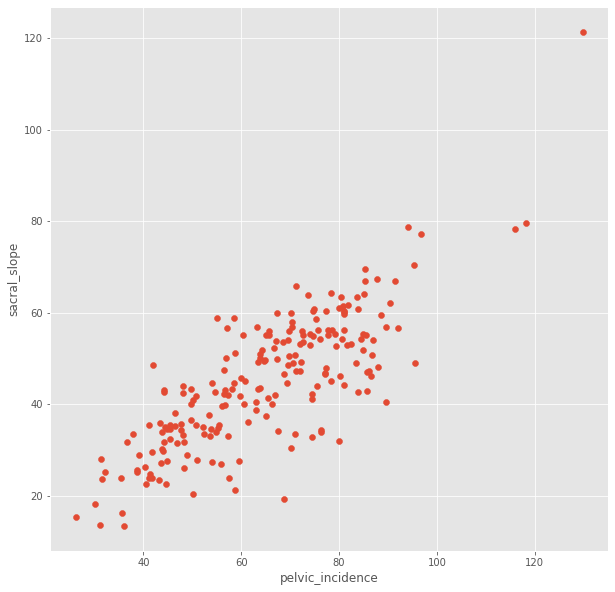

In [40]:
# Create data1 that includes pelvic_incidence that is feature and sacral_slope that is target variable.

data1 = data[data['class'] == 'Abnormal']
x = np.array(data1.loc[:, 'pelvic_incidence']).reshape(-1, 1)
y = np.array(data1.loc[:, 'sacral_slope']).reshape(-1, 1)

#Scatter
plt.figure(figsize=[10, 10])
plt.scatter(x=x, y=y)
plt.xlabel('pelvic_incidence')
plt.ylabel('sacral_slope')
plt.show()

In [41]:
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


Linear regression

    y = a + bx where y = target, x = feature and a = y-intercept b = slope of the line 
    In linear regression we use Ordinary Least Square (OLS) as loss function.
    OLS: Sum all residuals but some positive and negative residuals can cancel each other so we use sum of square of residuals. 
    Score: Score uses R^2 method that is ((y_pred - y_mean)^2 )/(y_actual - y_mean)^2

In [42]:
# Initializing Model
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

R^2 score:  0.6458410481075871


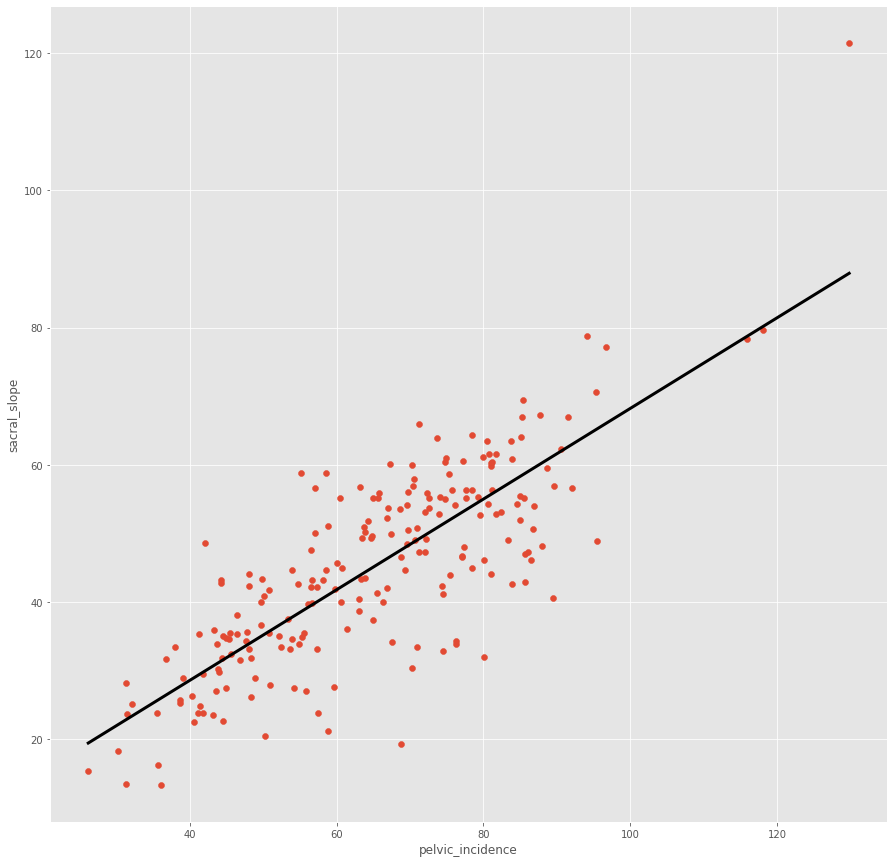

In [43]:
# Predict Space
predict_space = np.linspace(min(x), max(x)).reshape(-1, 1) # Linspace creates linearly spaced vectors

# Fit
reg.fit(x, y)

# Predict
predicted = reg.predict(predict_space)

# R^2
print('R^2 score: ', reg.score(x, y))

# Plotting Regression Line
plt.figure(figsize=(15,15))
plt.plot(predict_space, predicted, color='black', linewidth=3)
plt.scatter(x=x, y=y)
plt.xlabel('pelvic_incidence')
plt.ylabel('sacral_slope')
plt.show()

# Using Cross Validation

In [44]:
from sklearn.model_selection import cross_val_score
# reg = LinearRegression()

In [45]:
k = 5
cv_result = cross_val_score(reg, x, y, cv=k)
print('CV Scores: ', cv_result)
print('CV Scores Avg: ', np.sum(cv_result)/k)

CV Scores:  [0.32924233 0.61683991 0.53117056 0.1954798  0.29299864]
CV Scores Avg:  0.3931462502884868


# Using Regularization Techniques
## Lasso - L1

In [46]:
from sklearn.linear_model import Lasso

In [47]:
x = np.array(data1.loc[:, ['pelvic_incidence', 'pelvic_tilt numeric', 'lumbar_lordosis_angle', 'pelvic_radius']])
x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = 3, test_size = 0.3)
lasso = Lasso(alpha = 0.1, normalize = True)
lasso.fit(x_train,y_train)
# ridge_predict = lasso.predict(x_test)
print('Lasso score: ', lasso.score(x_test,y_test))
print('Lasso coefficients: ', lasso.coef_)

Lasso score:  0.9640334804327546
Lasso coefficients:  [ 0.82498243 -0.7209057   0.         -0.        ]


## Ridge - L2

In [48]:
from sklearn.linear_model import Ridge

In [49]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 2)
ridge = Ridge(alpha = 0.1, normalize = True)
ridge.fit(x_train, y_train)
ridge_predict = ridge.predict(x_test)
print('Ridge Score: ', ridge.score(x_test, y_test))

Ridge Score:  0.9114728424477408


In [50]:
from sklearn.linear_model import RidgeCV

In [51]:
# Cross Validation in Ridge
# cv_ridge = cross_val_score(ridge, x, y, cv=5)
# print('CV Scores: ', cv_result)
# print('CV Scores Avg: ', np.sum(cv_result)/k)

# list of alphas to check: 100 values from 0 to 5 with
r_alphas = np.logspace(0, 5, 100) # initiate the cross validation over alphas
ridge_model = RidgeCV(alphas=r_alphas, scoring='r2')# fit the model with the best alpha
ridge_model = ridge_model.fit(x_train, y_train)
print('Alpha Value: ', ridge_model.alpha_)
print('Ridge Score: ', ridge_model.score(x_test, y_test))

Alpha Value:  1.0
Ridge Score:  0.9999999710276466
